<a href="https://colab.research.google.com/github/adenehemia09/Penggunaan-CNN-untuk-analisis-dan-deteksi-covid-19-menggunakan-citra-medis/blob/main/Proyek_SKD_Kelompok_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

([0, 1, 2],
 [Text(0, 0, 'Covid'), Text(1, 0, 'Normal'), Text(2, 0, 'Viral Pneumonia')])

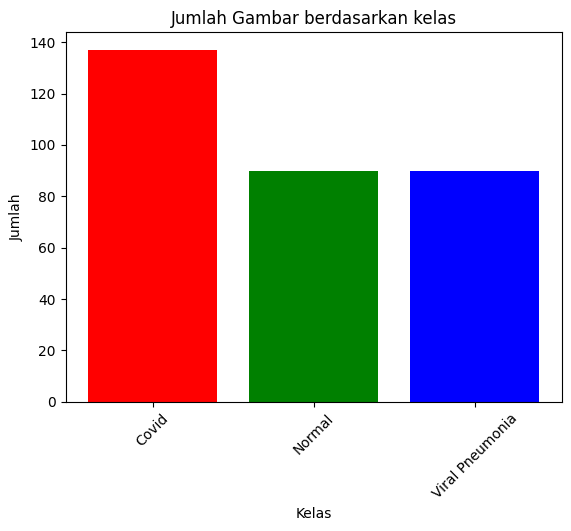

In [ ]:
import os
from collections import Counter
import matplotlib.pyplot as plt

dataset_path = '/content/drive/MyDrive/Tugas Penelitian/Covid19-dataset'

class_colors = {'Covid': 'red', 'Viral Pneumonia': 'blue', 'Normal': 'green'}

class_counts = Counter()

# Iterasi melalui folder "Training" dan "Validation"
for folder in ['train', 'test']:
    folder_path = os.path.join(dataset_path, folder)

    # Iterasi melalui setiap folder kelas
    for class_folder in os.listdir(folder_path):
        class_folder_path = os.path.join(folder_path, class_folder)

        # Menghitung jumlah file (gambar) dalam folder kelas
        num_images = len(os.listdir(class_folder_path))

        # Menyimpan jumlah dalam dictionary
        class_counts[class_folder] += num_images

class_names = class_counts.keys()
class_counts_values = class_counts.values()

# Plot diagram batang dengan warna kustom
colors = [class_colors.get(class_name, 'gray') for class_name in class_names]
plt.bar(class_names, class_counts_values, color=colors)

plt.xlabel('Kelas')
plt.ylabel('Jumlah')
plt.title('Jumlah Gambar berdasarkan kelas')
plt.xticks(rotation=45)

# Membuat legenda


In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  '/content/drive/MyDrive/Tugas Penelitian/Covid19-dataset/train',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 251 files belonging to 3 classes.
Using 201 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  '/content/drive/MyDrive/Tugas Penelitian/Covid19-dataset/test',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 66 files belonging to 3 classes.
Using 13 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['Covid', 'Normal', 'Viral Pneumonia']


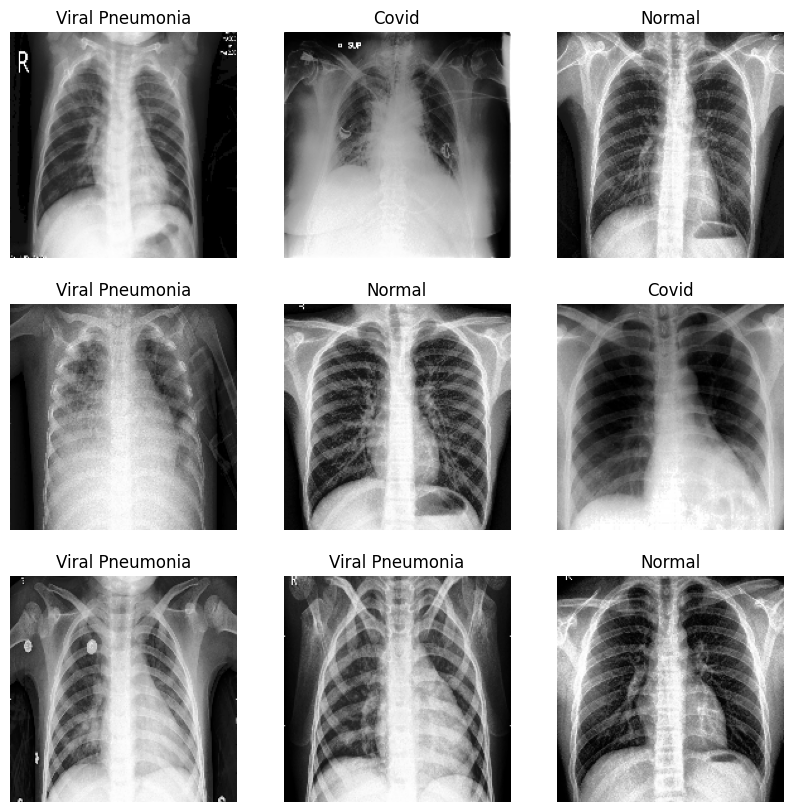

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
normalization_layer = layers.Rescaling(1./255)

In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0023088045 0.903011


In [ ]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [ ]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
7/7 [==============================] - 13s 2s/step - loss: 1.0406 - accuracy: 0.5025 - val_loss: 1.2236 - val_accuracy: 0.4615
Epoch 2/10
7/7 [==============================] - 9s 1s/step - loss: 0.5204 - accuracy: 0.8109 - val_loss: 0.6162 - val_accuracy: 0.6923
Epoch 3/10
7/7 [==============================] - 10s 1s/step - loss: 0.2849 - accuracy: 0.9005 - val_loss: 0.7221 - val_accuracy: 0.6923
Epoch 4/10
7/7 [==============================] - 8s 970ms/step - loss: 0.2021 - accuracy: 0.9403 - val_loss: 0.4776 - val_accuracy: 0.7692
Epoch 5/10
7/7 [==============================] - 9s 1s/step - loss: 0.1301 - accuracy: 0.9502 - val_loss: 0.3831 - val_accuracy: 0.7692
Epoch 6/10
7/7 [==============================] - 7s 1s/step - loss: 0.0709 - accuracy: 0.9701 - val_loss: 0.4840 - val_accuracy: 0.8462
Epoch 7/10
7/7 [==============================] - 9s 1s/step - loss: 0.0526 - accuracy: 0.9851 - val_loss: 0.3014 - val_accuracy: 0.8462
Epoch 8/10
7/7 [====================

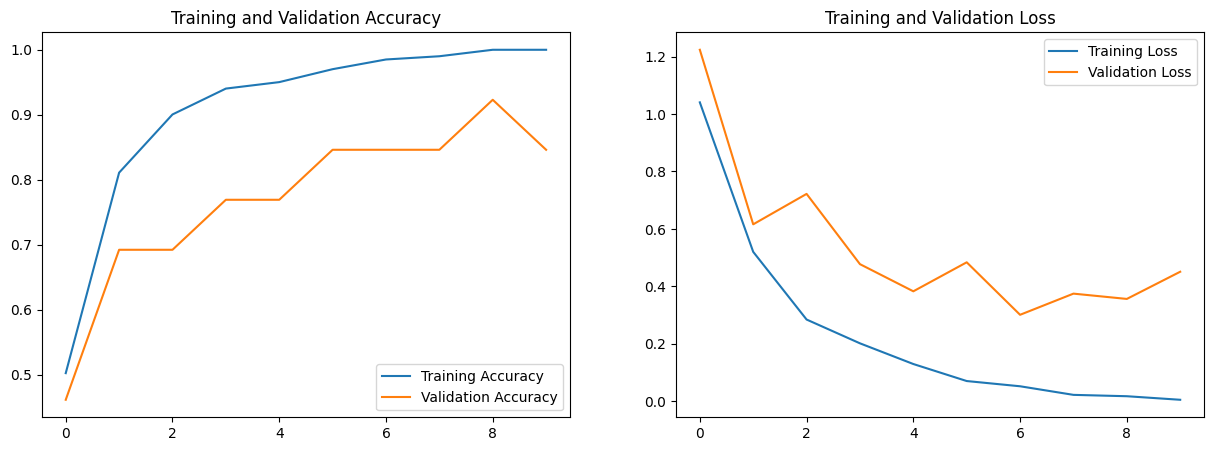

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

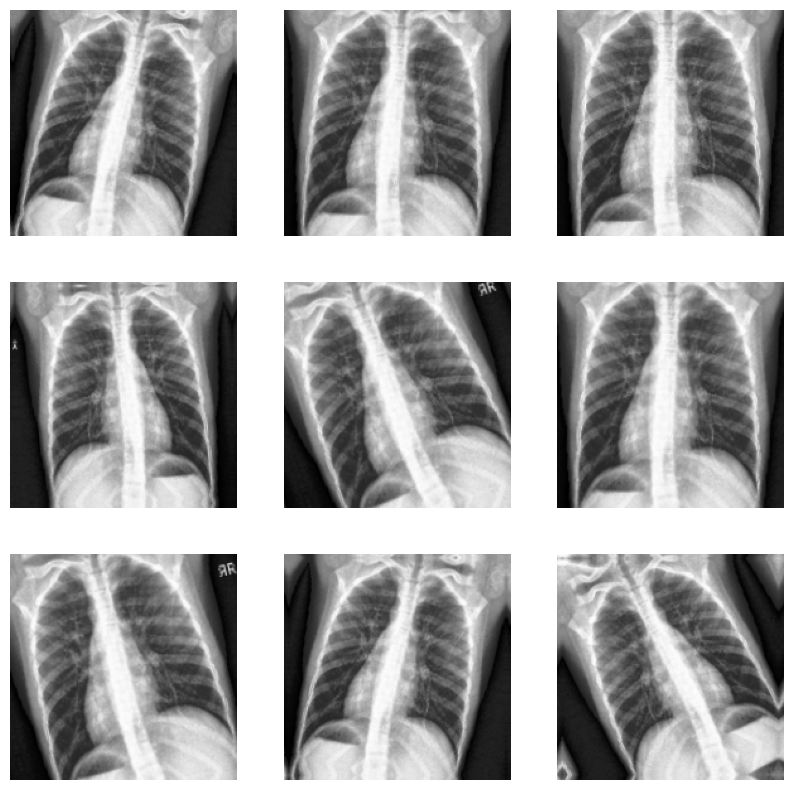

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                  

In [ ]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
7/7 [==============================] - 12s 1s/step - loss: 1.5099 - accuracy: 0.3632 - val_loss: 1.1612 - val_accuracy: 0.1538
Epoch 2/15
7/7 [==============================] - 8s 1s/step - loss: 1.0467 - accuracy: 0.4577 - val_loss: 0.9894 - val_accuracy: 0.6154
Epoch 3/15
7/7 [==============================] - 8s 1s/step - loss: 0.8898 - accuracy: 0.6368 - val_loss: 0.7872 - val_accuracy: 0.7692
Epoch 4/15
7/7 [==============================] - 9s 1s/step - loss: 0.6849 - accuracy: 0.7264 - val_loss: 0.8166 - val_accuracy: 0.5385
Epoch 5/15
7/7 [==============================] - 10s 2s/step - loss: 0.4986 - accuracy: 0.7960 - val_loss: 1.1942 - val_accuracy: 0.6923
Epoch 6/15
7/7 [==============================] - 8s 1s/step - loss: 0.4087 - accuracy: 0.8358 - val_loss: 0.9394 - val_accuracy: 0.6154
Epoch 7/15
7/7 [==============================] - 9s 1s/step - loss: 0.3701 - accuracy: 0.8557 - val_loss: 0.8500 - val_accuracy: 0.6154
Epoch 8/15
7/7 [=======================

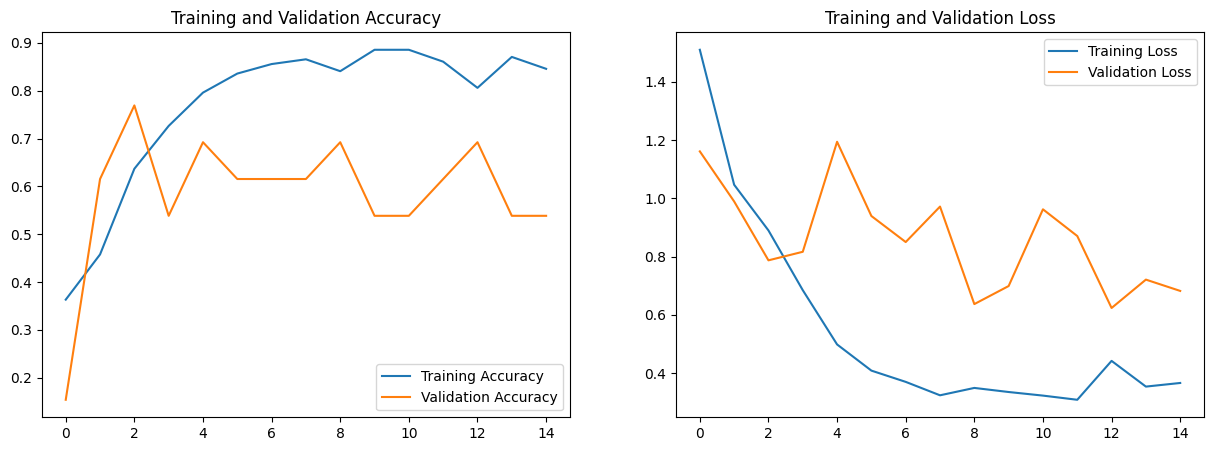

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
img = tf.keras.utils.load_img(
    '/content/drive/MyDrive/Tugas Penelitian/Covid19-dataset/test/Covid/0100.jpeg', target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

print(predictions)

1/1 [==============================] - 0s 157ms/step
This image most likely belongs to Covid with a 99.67 percent confidence.
[[ 5.550574  -0.1787536 -3.5646265]]


In [ ]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

In [ ]:
TF_MODEL_FILE_PATH = 'model.tflite' # The default path to the saved TensorFlow Lite model

interpreter = tf.lite.Interpreter(model_path=TF_MODEL_FILE_PATH)

In [ ]:
classify_lite = interpreter.get_signature_runner('serving_default')
classify_lite

In [ ]:
predictions_lite = classify_lite(sequential_1_input=img_array)['outputs']
score_lite = tf.nn.softmax(predictions_lite)

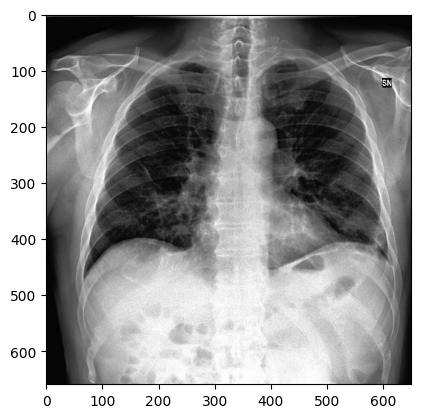

In [ ]:
img_test = plt.imread('/content/drive/MyDrive/Tugas Penelitian/Covid19-dataset/test/Covid/0100.jpeg')

plt.imshow(img_test)

In [ ]:
print(
    "Gambar ini kemungkinan besar milik {} dengan tingkat kepercayaan {:.2f} persen."

    .format(class_names[np.argmax(score_lite)], 100 * np.max(score_lite))
)

Gambar ini kemungkinan besar milik Covid dengan tingkat kepercayaan 99.67 persen.


In [ ]:
print(np.max(np.abs(predictions - predictions_lite)))

1.66893e-06
